
# Life Expectancy Data: Exploratory Data Analysis (EDA)

This notebook explores the **Life Expectancy Data** from the World Health Organization (WHO).  
The aim is to understand key relationships between socioeconomic and health-related features and prepare the dataset for a **Linear Regression** model.

We'll perform:
- Data overview and cleaning  
- Summary statistics and null/duplicate checks  
- Visual exploration of correlations, distributions, and outliers  


### Setup and read in the data

In [7]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('../src') # Add source code to path

# Import source code
from preprocessing import load_data

# Read in the dataset
df = load_data()

# Display first few rows to confirm load
df.head()


,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


## Data Overview

In [8]:
# Check dataset dimensions (rows, columns)

df.shape


(2864, 21)

In [9]:
# Check column names and data types

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    


**Observations:**  
- Numeric values appear compatible.  
- 'Country' and 'Region' are categorical and will require encoding if included in the model.  


In [10]:
# View random sample of rows to inspect data variety

df.sample(5)


,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
478,Hungary,European Union,2014,4.5,5.4,131.9085,10.92,88,99,27.1,...,99,0.08,12237,9.87,1.7,1.6,11.8,1,0,75.8
91,Japan,Asia,2003,2.9,4.0,70.3060,7.82,83,86,22.5,...,97,0.17,31830,127.72,1.7,1.4,11.0,1,0,81.8
496,Denmark,European Union,2014,3.5,4.1,69.2705,9.55,88,84,25.3,...,94,0.04,52405,5.64,1.1,0.9,12.8,1,0,80.7
2727,Malaysia,Asia,2015,6.9,8.1,121.7230,0.55,99,99,25.6,...,99,0.14,9955,30.27,7.5,7.3,10.2,0,1,75.5
24,Estonia,European Union,2004,6.2,7.8,194.0975,15.52,90,97,25.8,...,94,0.08,13283,1.36,2.2,2.3,12.0,1,0,71.9


In [11]:
# Check number of unique values per column

df.nunique().sort_values(ascending=False)


Adult_mortality                2850
GDP_per_capita                 2564
Population_mln                 1803
Alcohol_consumption            1164
Under_five_deaths              1035
Infant_deaths                   847
Life_expectancy                 396
Incidents_HIV                   393
Thinness_five_nine_years        207
Thinness_ten_nineteen_years     200
Country                         179
Schooling                       130
BMI                             120
Measles                          87
Hepatitis_B                      80
Diphtheria                       80
Polio                            77
Year                             16
Region                            9
Economy_status_Developed          2
Economy_status_Developing         2
dtype: int64


**Insight:**  
This helps identify potential categorical features and assess diversity within columns.


## Data Cleaning

### Missing Values

In [12]:
# Check for missing values

df.isnull().sum()


Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64

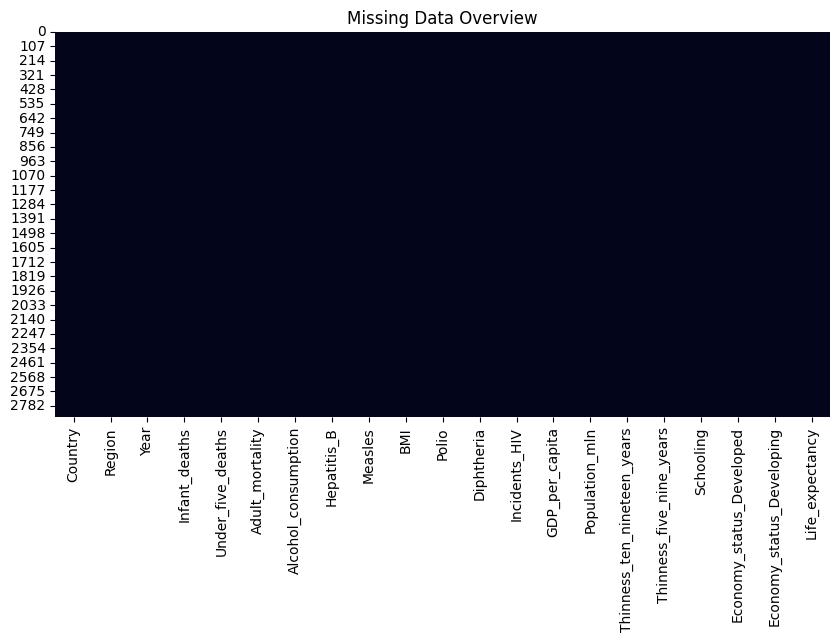

In [13]:
# Visualize missing data heatmap

plt.figure(figsize=(10,5))
sns.heatmap(
        df.isnull(), 
        cbar=False)
plt.title("Missing Data Overview")
plt.show()



**Observation:**  
No missing values are shown


### Duplicate Check

In [14]:
# Check for duplicate rows

df.duplicated().sum()


np.int64(0)

### Column Name Consistency

In [15]:
# Display column names

print(df.columns.tolist())


['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths', 'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita', 'Population_mln', 'Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed', 'Economy_status_Developing', 'Life_expectancy']



Check for any spelling inconsistencies or formatting issues. They're all compatible with modelling


### Categorical Entry Consistency

In [16]:
region = df.Region.unique()
print(region)

['Middle East' 'European Union' 'Asia' 'South America'
 'Central America and Caribbean' 'Rest of Europe' 'Africa' 'Oceania'
 'North America']


In [17]:
country = df.Country.unique()
print(country)

['Turkiye' 'Spain' 'India' 'Guyana' 'Israel' 'Costa Rica'
 'Russian Federation' 'Hungary' 'Jordan' 'Moldova' 'Brazil' 'Malta'
 'Bahamas, The' 'Ukraine' 'Switzerland' 'Norway' 'Finland' 'Comoros'
 'Japan' 'Gabon' 'Ghana' 'Philippines' 'Congo, Rep.' 'Madagascar'
 'Estonia' 'Belize' 'Kazakhstan' 'Cameroon' 'Zimbabwe' 'Bhutan'
 'South Africa' 'Eritrea' 'Germany' 'Saudi Arabia' 'Kiribati' 'Seychelles'
 'Singapore' 'Togo' 'Denmark' 'Gambia, The' 'Sweden' 'Austria'
 'Kyrgyz Republic' 'Grenada' 'Brunei Darussalam' 'Greece' 'Uruguay'
 'Croatia' 'Romania' 'Central African Republic' 'Algeria' 'Yemen, Rep.'
 'Armenia' 'St. Vincent and the Grenadines' 'Kenya'
 'Micronesia, Fed. Sts.' 'Antigua and Barbuda' 'Nepal' 'Lithuania'
 'Vanuatu' 'Afghanistan' 'Kuwait' 'Argentina' 'Panama' 'Oman' 'France'
 'Bosnia and Herzegovina' 'Mauritania' 'Somalia' 'Azerbaijan' 'Maldives'
 'Guinea-Bissau' 'Solomon Islands' 'Congo, Dem. Rep.' 'Namibia' 'Eswatini'
 'Nigeria' 'United Arab Emirates' 'Burundi' 'Tajikistan' 'H

Spelling inconsistencies: No spelling inconsistencies found in entries for 'Country' and 'Region'

### Column (Feature) Categorisation: Sensitive vs Non-Sensitive

Sensitive: Identifiers: Country, Year

Health Stats: Alcohol_consumption, Hepatitis_B, Measles, BMI, Polio, Diphtheria, Incidents_HIV, Thinness_ten_nineteen_years and Thinness_five_nine_years

Non-Sensitive: Infant_deaths, Under_five_deaths, GDP_per_capita, 'Population_mln', Schooling, Economy_status_Developed and Economy_status_Developing

Reasoning - We decided to classify specific identifiers and anything from health records as sensitive data, and any information that is publicly available as non-sensitive data

## Summary Statistics

In [18]:
# Summary of numeric features

df.describe()


,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000



**Interpretation Notes:**  
- Check for potential outliers or unrealistic values (e.g., 0 for non-zero metrics), of which there are none.  
- Identify columns with large value ranges for potential scaling later.  


## Exploratory Visual Analysis

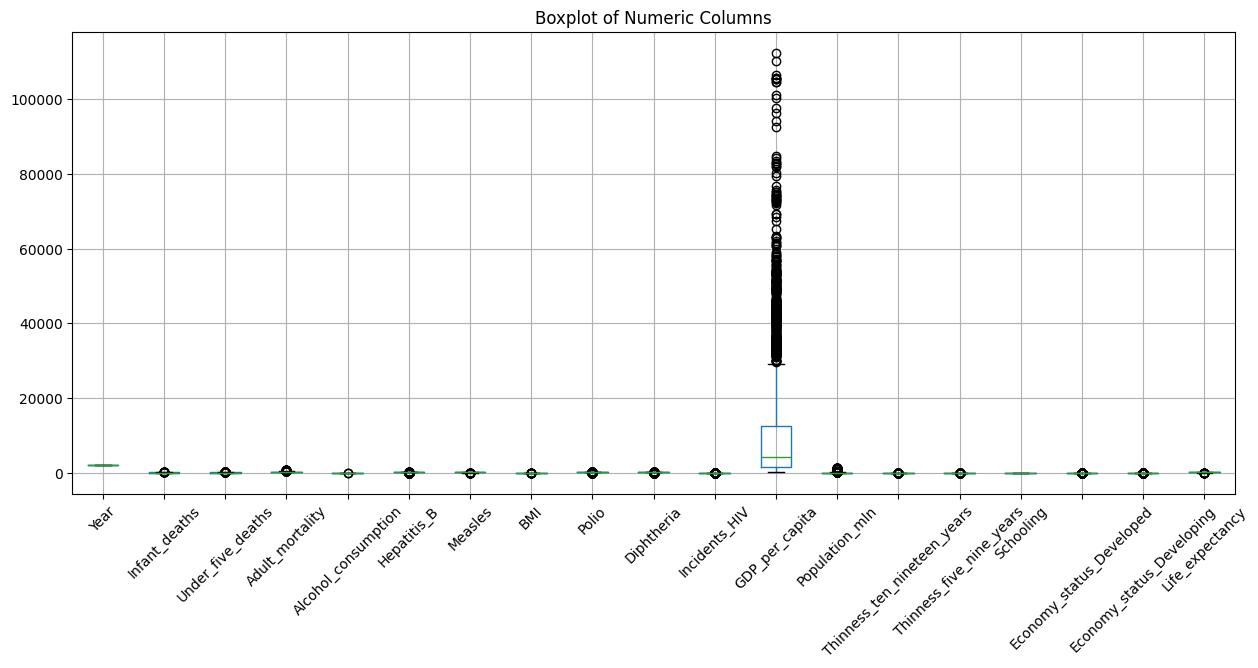

In [19]:
# Boxplot to visually inspect outliers across numeric columns

plt.figure(figsize=(15,6))
df.boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot of Numeric Columns")
plt.show()


## Correlations:

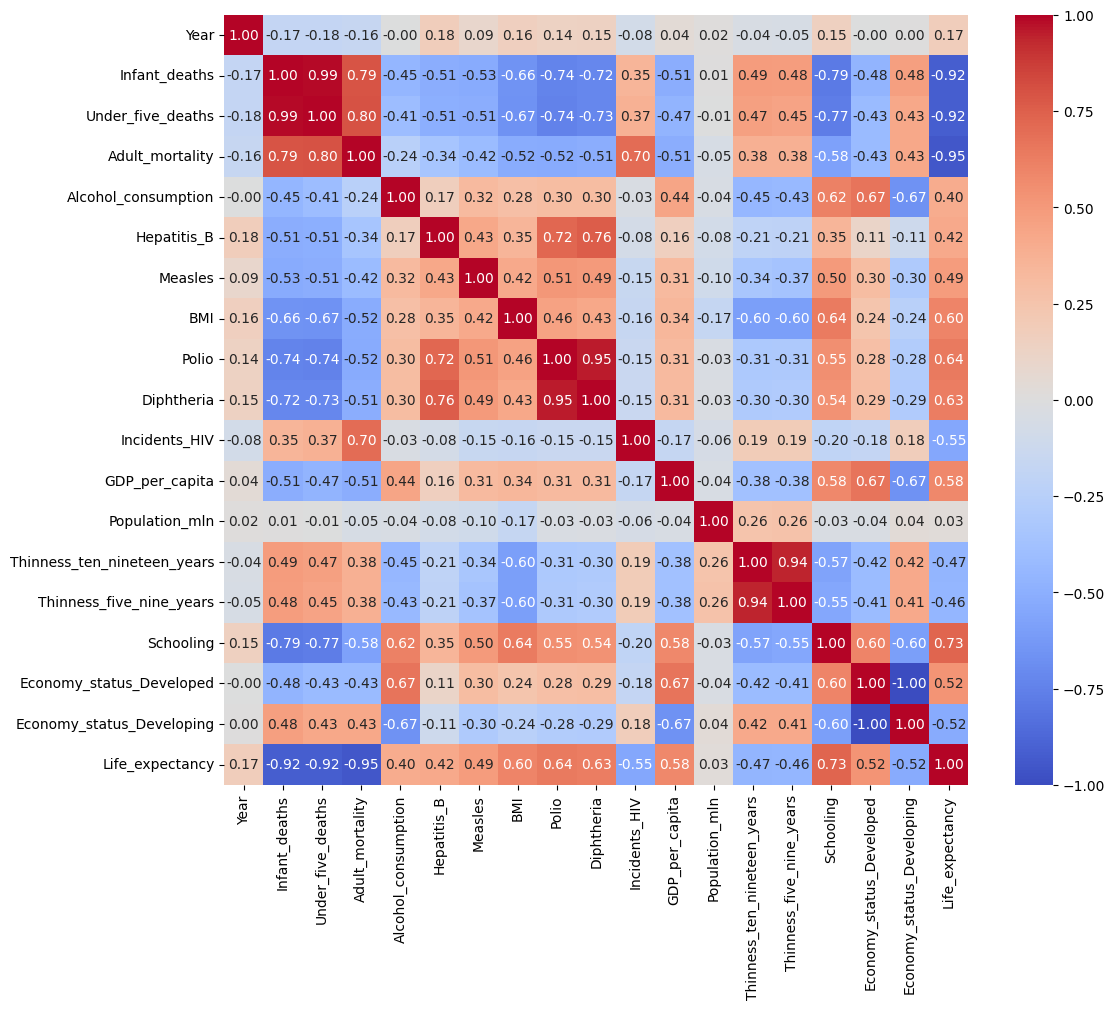

In [20]:
# Correlation heatmap for numerical features

corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()



**Observations:**  

Some strong positive and negative correlations to explore further

Multicollinearity & redundancy:

Economy_status_Developed and Economy_status_Developing
Under_five_deaths and Infant_deaths
 

### Feature Distributions

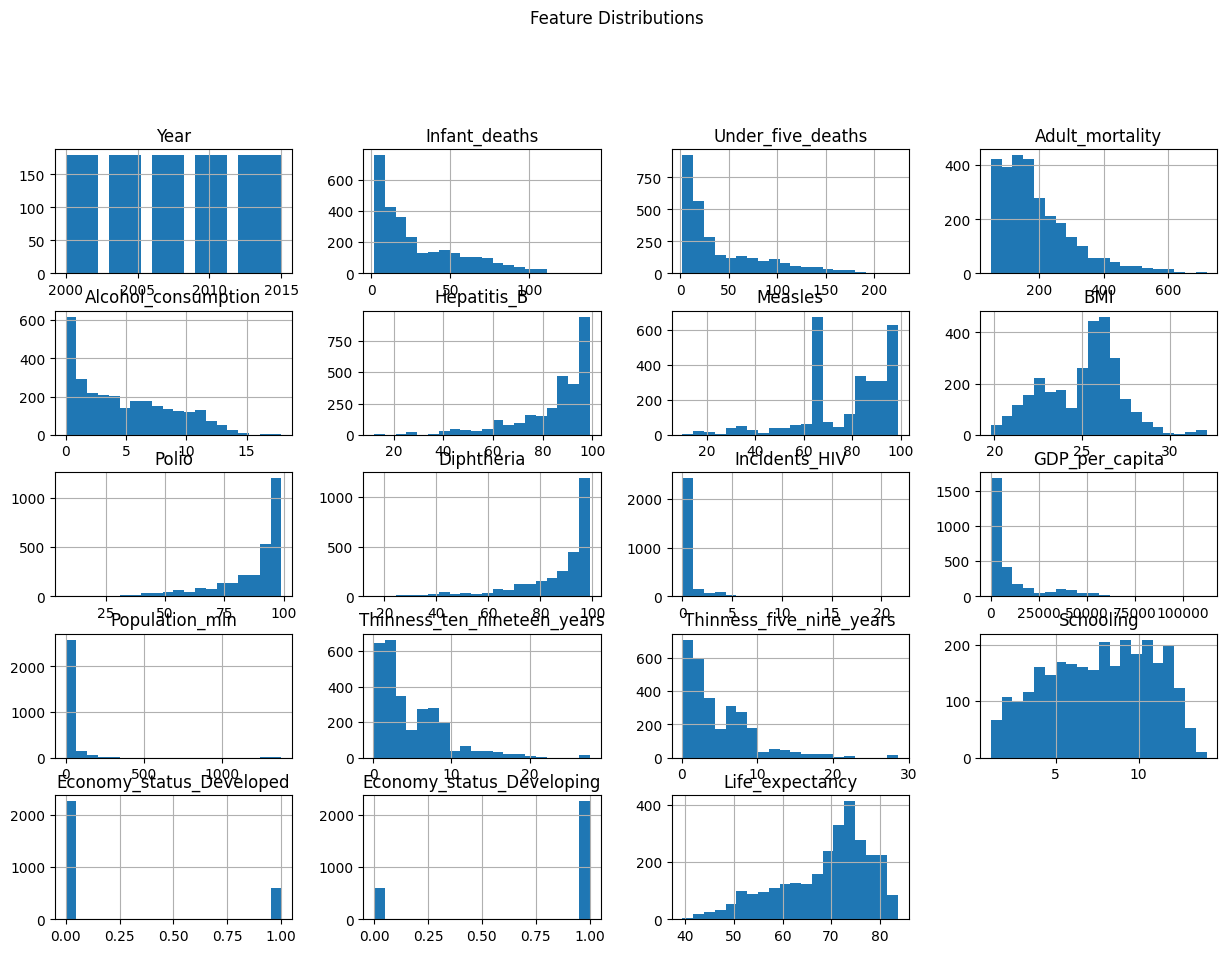

In [21]:
# Histograms for all numeric columns

df.hist(figsize=(15,10), bins=20)
plt.suptitle("Feature Distributions", y=1.02)
plt.show()



**Observation:**  
Helps identify skewed distributions or features that may need transformation before regression.


### Correlation With Life Expectancy

In [22]:
# Correlation of all numeric columns with life expectancy

corr_life = df.corr(numeric_only=True)['Life_expectancy'].sort_values(ascending=False)

# Display the top 10 most correlated features
print('Top positive correlations:')
print(corr_life.head(10))

print('\nTop negative correlations:')
print(corr_life.tail(10))



Top positive correlations:
Life_expectancy             1.000000
Schooling                   0.732484
Polio                       0.641217
Diphtheria                  0.627541
BMI                         0.598423
GDP_per_capita              0.583090
Economy_status_Developed    0.523791
Measles                     0.490019
Hepatitis_B                 0.417804
Alcohol_consumption         0.399159
Name: Life_expectancy, dtype: float64

Top negative correlations:
Alcohol_consumption            0.399159
Year                           0.174359
Population_mln                 0.026298
Thinness_five_nine_years      -0.458166
Thinness_ten_nineteen_years   -0.467824
Economy_status_Developing     -0.523791
Incidents_HIV                 -0.553027
Infant_deaths                 -0.920032
Under_five_deaths             -0.920419
Adult_mortality               -0.945360
Name: Life_expectancy, dtype: float64


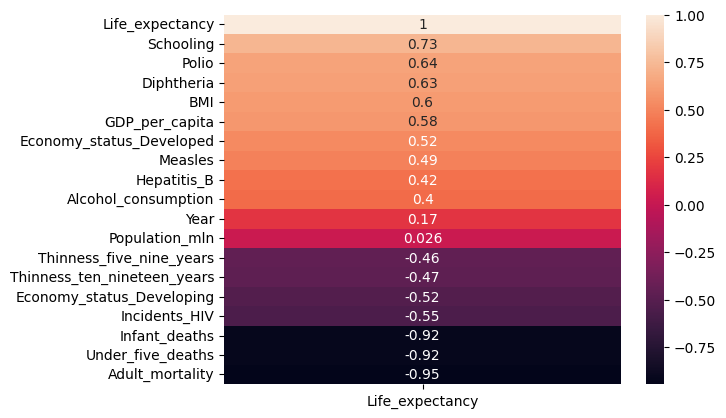

In [23]:
# Heatmap to visualise these correlations

corr = df.corr(numeric_only=True)
sns.heatmap(corr[['Life_expectancy']].sort_values(by='Life_expectancy', ascending=False), annot=True)
plt.show()

Identified Potential Features of Interest:

- Adult_mortality
- Infant_deaths
- Schooling
- Polio
- Diptheria
- BMI
- GDP_per_capita
- Economy_status_Developed
- Measles
- Thinness_ten_nineteen_years

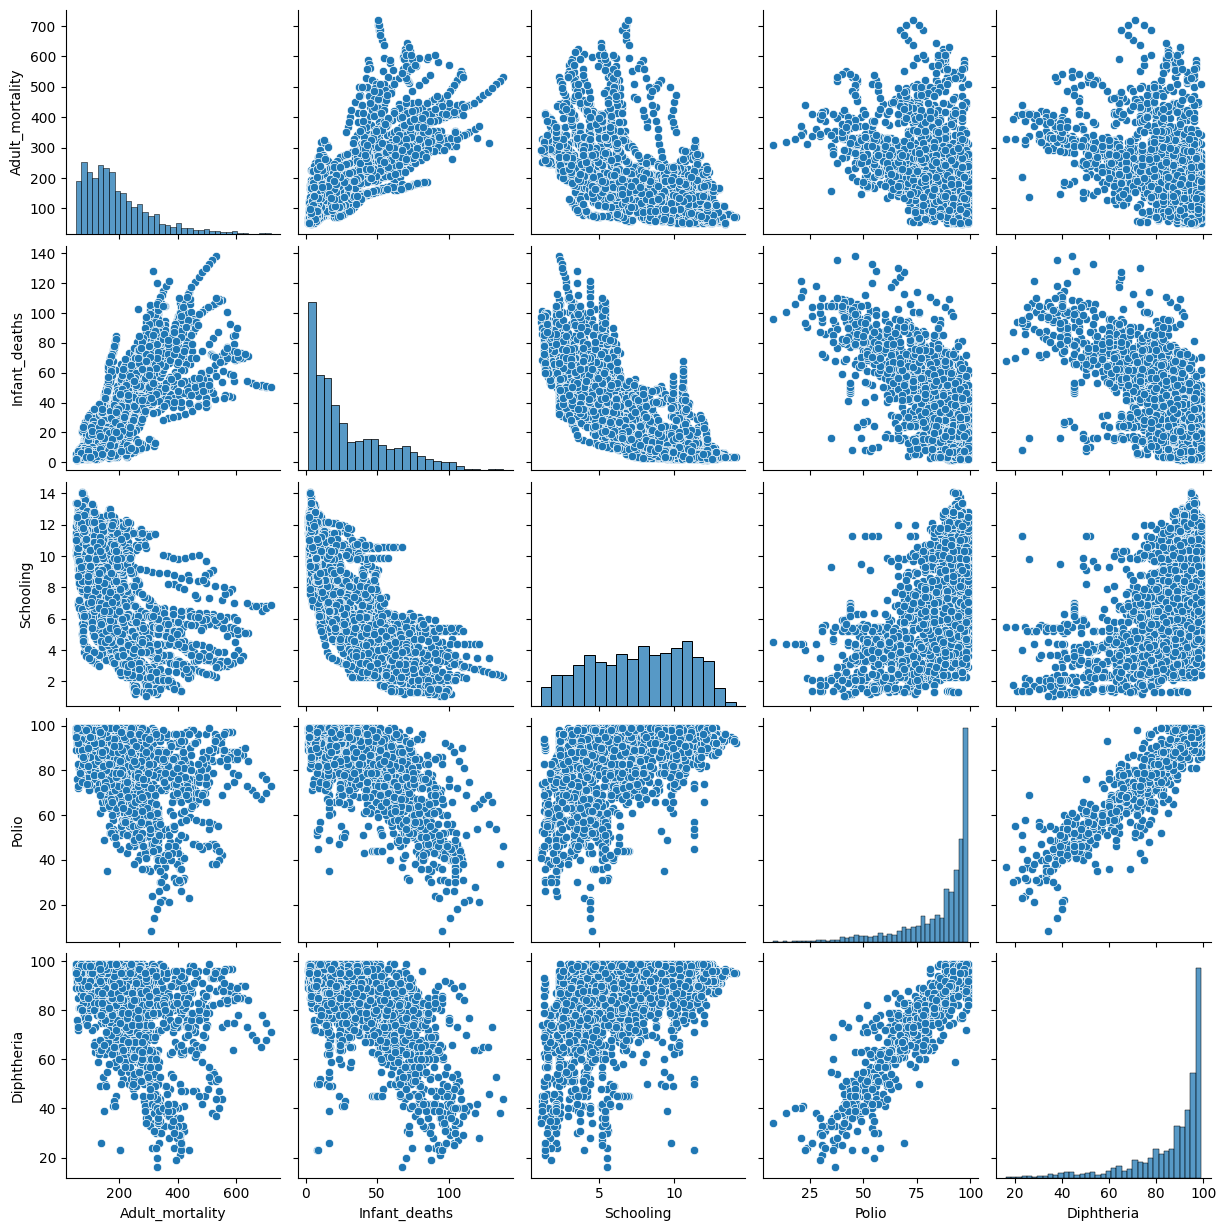

In [24]:
# Pair plot of the top 5 most correlated features in relation to themselves

cols = [ 
        'Adult_mortality',
        'Infant_deaths',
        'Schooling',
        'Polio',
        'Diphtheria',
]


sns.pairplot(
    df[cols]) 
plt.show()

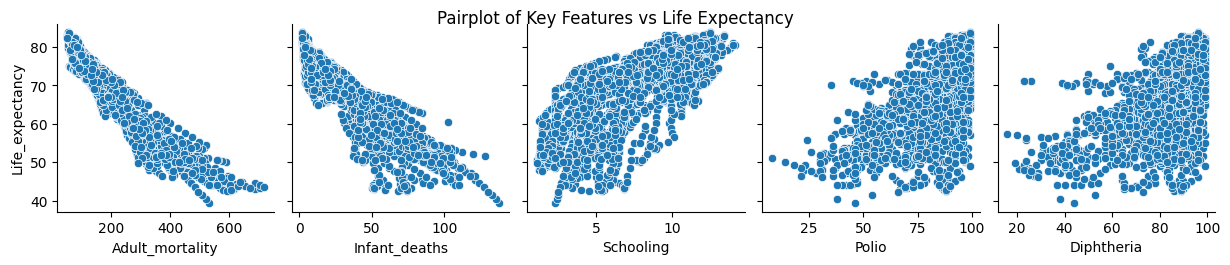

In [25]:
# Pair plot of the top 5 most correlated features in relation to life expectancy

cols = [ 
        'Adult_mortality',
        'Infant_deaths',
        'Schooling',
        'Polio',
        'Diphtheria',
]

sns.pairplot(
    df, 
    x_vars=cols,
    y_vars=['Life_expectancy'],
)
plt.suptitle('Pairplot of Key Features vs Life Expectancy', y=1.02)
plt.show()


**Insight:**  
These visuals help spot linear trends that could be meaningful for our regression model.



## Summary of Findings

- Dataset appears clean with no major missing or duplicate data.  
- Numeric and categorical columns identified.  
- Outlier inspection and correlation analysis reveal potential influential variables.  
- Data is now ready for preprocessing and modeling.
  